### 手动实现Harris角点检测

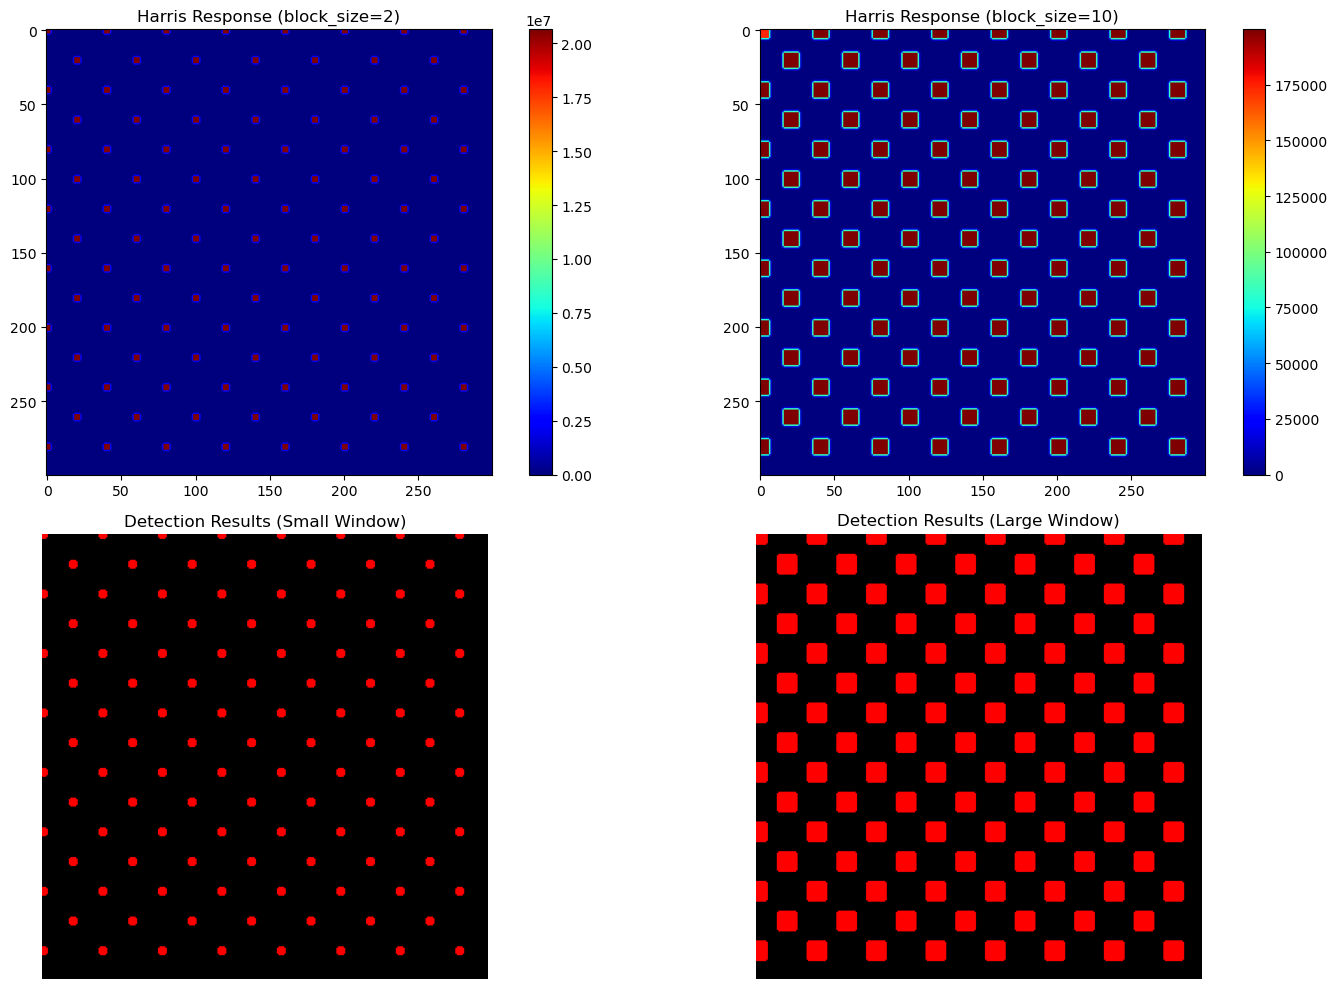

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


gray = np.zeros((300, 300), dtype=np.uint8)
gray[::40, ::40] = 255
gray[20::40, 20::40] = 255

def find_harris_demo(src_gray, block_size=2, ksize=3, k=0.04):
    
    gray_f = np.float32(src_gray)
    dst = cv2.cornerHarris(gray_f, block_size, ksize, k)
    
    dst = cv2.dilate(dst, None)
    threshold = 0.01 * dst.max()

    res_img = cv2.cvtColor(src_gray, cv2.COLOR_GRAY2BGR)
    res_img[dst > threshold] = [0, 0, 255]
    
    return res_img, dst


res_small, resp_small = find_harris_demo(gray, block_size=2)
res_large, resp_large = find_harris_demo(gray, block_size=10)
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(resp_small, cmap='jet')
plt.title('Harris Response (block_size=2)')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.imshow(resp_large, cmap='jet')
plt.title('Harris Response (block_size=10)')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(res_small, cv2.COLOR_BGR2RGB))
plt.title('Detection Results (Small Window)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(res_large, cv2.COLOR_BGR2RGB))
plt.title('Detection Results (Large Window)')
plt.axis('off')

plt.tight_layout()
plt.show()